Import modules

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats

### Load Training Data

In [257]:
tdata = pd.read_csv('cleaned_train.csv',index_col=0)

In [258]:
tdata.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinC,CabinN
PassengerId,,,,,,,,,,,
1,0,3,1,1,22.0,1,0,7.2500,1,0,0.0
2,1,1,2,0,38.0,1,0,71.2833,0,3,85.0
3,1,3,3,0,26.0,0,0,7.9250,1,0,0.0
4,1,1,2,0,35.0,1,0,53.1000,1,3,123.0
5,0,3,1,1,35.0,0,0,8.0500,1,0,0.0


In [259]:
y= pd.read_csv('train.csv',usecols=['Survived'],index_col=None)

In [260]:
# drop out these columns that are already combined
tdata=tdata.drop(columns=['Survived'])#,'SibSp','Parch','Pclass','CabinC'],axis =1)

In [261]:
# start by running the Random forest model with bechmarked parameters
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=80, min_samples_split=12, min_samples_leaf=1,oob_score=True,random_state=22)

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tdata,y,test_size=0.3,random_state=22)

In [263]:
RFC.fit(X_train,y_train)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

In [264]:
y_pred = RFC.predict(X_test)

In [265]:
from sklearn import metrics
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 81.34328358208955 %
Confusion Matrix is:
 [[147  17]
 [ 33  71]]
Classification Error is:
 18.656716417910445 %


In [266]:
from sklearn.model_selection import cross_val_score 
scores0 = cross_val_score(RFC,tdata,y,cv=5)

/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed whe

In [267]:
print("Average accuracy score from cv:",np.mean(scores0)*100,"%")
print("Classification Accuracy score variance from cv:",np.var(scores0))

Average accuracy score from cv: 83.95562501706688 %
Classification Accuracy score variance from cv: 0.0008605646150345021


### Update testing summary

| Model Type | Parameters | Classification Accuracy(%) | Confusion Matrix | CV model variance |
| --- | --- | --- | --- | --- |
| Pure Guess | Guess based on Majority(Deceased) | 61.62 | [[549,0][342,0]]| None |
| Random Forest | Default cleaned data, gini, min_samples_split=12, min_samples_leaf=1, 80 estimators | cv average 83.95 | [[147,17][33,71]]| 8.6*10-4 |

In [282]:
# Try combine the information of 'Pclass'+'CabinC', and 'SibSp'+'Parch'
tdata['familySize']=tdata['SibSp']+tdata['Parch']+1
tdata['RankC']=tdata['Pclass']+tdata['CabinC']

In [270]:
# create prediction results for test data
# Retrain model using all training data
RFC1 = RandomForestClassifier(n_estimators=80, min_samples_split=12, min_samples_leaf=1,oob_score=True,random_state=22)
X_train, X_test, y_train, y_test = train_test_split(tdata,y,test_size=0.3,random_state=22)
RFC1.fit(X_train,y_train)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

In [271]:
y_pred = RFC1.predict(X_test)

In [272]:
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 79.8507462686567 %
Confusion Matrix is:
 [[143  21]
 [ 33  71]]
Classification Error is:
 20.149253731343293 %


In [276]:
scores1 = cross_val_score(RFC1,tdata,y,cv=5)

/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed whe

In [277]:
print("Average accuracy score from cv:",np.mean(scores1)*100,"%")
print("Classification Accuracy score variance from cv:",np.var(scores1))

Average accuracy score from cv: 84.18034411819049 %
Classification Accuracy score variance from cv: 0.0005545747505808147


#### Let's take a look at the features used in model fitting and their ranking(how much it helps to predict the end result, based on the model)

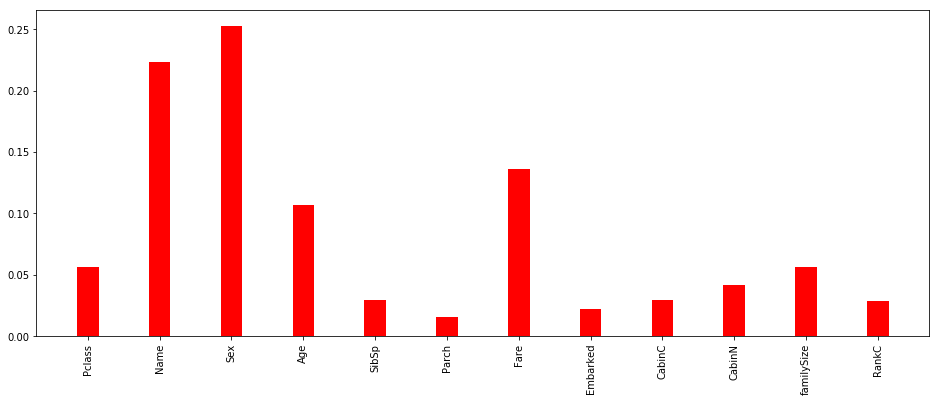

In [284]:
from FeaImpPlotting import plot_ft_imp
plot_ft_imp(tdata,RFC1.feature_importances_)

#### Looks like the feature importance is not fully reflecting the effect we see/expect in the data exploration step. 

##### E.g. (1)The 'Name' feature seems to raise too high of an importance to the target, 
#####      (2)The 'RankC' seems not having as high effect as we expected (which includes 'Pclass') 
#####      (3)The 'Embarked' port seems not having good effect to target predicting

#### Below I used the first model to do a prediction. Submit to Kaggle, ch result yields ranking #3197(28.5%), score 0.78947

### Update testing summary

| Model Type | Parameters | Classification Accuracy(%) | Confusion Matrix | CV model variance |
| --- | --- | --- | --- | --- |
| Pure Guess | Guess based on Majority(Deceased) | 61.62 | [[549,0][342,0]]| None |
| Random Forest | Default cleaned data, gini, min_samples_split=12, min_samples_leaf=1, 80 estimators | cv average 83.95 | [[147,17][33,71]]| 8.6*10-4 |
| Random Forest | Combined FamilySize, RankC | cv average 84.18 | [[143,21][33,71]]| 5.5*10-4 |

In [285]:
# load test data
testdata= pd.read_csv('cleaned_test.csv',index_col=None)
testdata['familySize']=testdata['SibSp']+testdata['Parch']+1
testdata['RankC']=testdata['Pclass']+testdata['CabinC']

In [54]:
pred_test=RFC.predict(testdata)

In [69]:
# extract Passenger Id and assign as index of the test data 
rind=pd.read_csv('test.csv',usecols=['PassengerId'])

In [73]:
rind['Survived']=pred_test

In [76]:
rind.set_index('PassengerId',inplace=True)

In [81]:
rind.to_csv('prediction0.csv') ## This is submission 1

#### Test the frequency encoding of column 'Embarked'

In [288]:
encodingE=tdata.groupby('Embarked').size()/len(tdata)
tdata['Enc']=tdata.Embarked.map(encodingE)

In [289]:
tdata.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinC,CabinN,familySize,RankC,Enc
PassengerId,,,,,,,,,,,,,
1,3,1,1,22.0,1,0,7.2500,1,0,0.0,2,3,0.725028
2,1,2,0,38.0,1,0,71.2833,0,3,85.0,2,4,0.188552
3,3,3,0,26.0,0,0,7.9250,1,0,0.0,1,3,0.725028
4,1,2,0,35.0,1,0,53.1000,1,3,123.0,2,4,0.725028
5,3,1,1,35.0,0,0,8.0500,1,0,0.0,1,3,0.725028


In [290]:
X_train, X_test, y_train, y_test = train_test_split(tdata,y,test_size=0.3,random_state=22)
RFC2 = RandomForestClassifier(n_estimators=80, min_samples_split=12, min_samples_leaf=1,oob_score=True, random_state=22)

In [291]:
RFC2.fit(X_train,y_train)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

In [292]:
y_pred = RFC2.predict(X_test)
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 80.59701492537313 %
Confusion Matrix is:
 [[144  20]
 [ 32  72]]
Classification Error is:
 19.40298507462687 %


In [293]:
scores2 = cross_val_score(RFC2,tdata,y,cv=5)
print("Average accuracy score from cv:",np.mean(scores2)*100,"%")
print("Classification Accuracy score variance from cv:",np.var(scores2))

/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed whe

Average accuracy score from cv: 83.61980177935425 %
Classification Accuracy score variance from cv: 0.0005517114082639682


### Update testing summary

| Model Type | Parameters | Classification Accuracy(%) | Confusion Matrix | CV model variance |
| --- | --- | --- | --- | --- |
| Pure Guess | Guess based on Majority(Deceased) | 61.62 | [[549,0][342,0]]| None |
| Random Forest | Default cleaned data, gini, min_samples_split=12, min_samples_leaf=1, 80 estimators | cv average 83.95 | [[147,17][33,71]]| 8.6*10^-4 |
| Random Forest | Combined FamilySize, RankC | cv average 84.18 | [[143,21][33,71]]| 5.5*10^-4 |
| Random Forest | Combined FamilySize, RankC, frequencyEcode 'Embarked'| cv average 83.62 | [[144,20][32,79]]| 5.52*10^-4 |

#### Concludes that changing 'Embarked' to frequency encoding does not improve model performance much.

#### Try modify the categories of 'Name' columns

In [294]:
## Try classifying the 'Name' columns further more. See if it enhance the model.
tdata.Name.value_counts()

1     517
3     182
2     125
5      40
10      7
9       6
18      2
8       2
15      2
14      1
13      1
11      1
7       1
4       1
16      1
17      1
19      1
Name: Name, dtype: int64

In [295]:
tdata = pd.read_csv('cleaned_train.csv',index_col='PassengerId')
tdata=tdata.drop(columns=['Survived'],axis =1)
tdata['familySize']=tdata['SibSp']+tdata['Parch']+1
tdata['RankC']=tdata['Pclass']+tdata['CabinC']

#### According to data cleaning step mapping of 'Name', mapping dictionary is :   
##### {'Mr.':1,'Mrs.':2,'Miss.':3,'Ms.':4,'Master.':5,'Mrs':6,'Capt.':7,'Col.':8,'Rev.':9,'Dr.':10,'Don.':11,
##### 'Dona.':12,'Jonkheer.':13,'Lady.':14,'Major.':15,'Sir.':16,'Countess.':17,'Mlle.':18,'Mme.':19}
#### Then, category 1-6 are frequent categories. And can be classified to 'Female', 'Male' 
#### and 'Kid'. While all other 6-18 can be put into 'infrequent' class.

In [296]:
remap= { 1:1,2:2,3:2,4:2,5:3,6:2,7:4,8:4,9:4,10:4,11:4,12:4,13:4,14:2,15:4,16:1,17:4,18:4,19:4}
tdata['Name']=tdata['Name'].map(remap)

In [297]:
X_train, X_test, y_train, y_test = train_test_split(tdata,y,test_size=0.3,random_state=22)
RFC3 = RandomForestClassifier(n_estimators=80, min_samples_split=12, min_samples_leaf=1,oob_score=True,random_state=22)

In [298]:
RFC3.fit(X_train,y_train)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

In [299]:
y_pred = RFC3.predict(X_test)
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 81.34328358208955 %
Confusion Matrix is:
 [[147  17]
 [ 33  71]]
Classification Error is:
 18.656716417910445 %


In [300]:
scores3 = cross_val_score(RFC3,tdata,y,cv=5)
print("Average accuracy score from cv:",np.mean(scores3)*100,"%")
print("Classification Accuracy score variance from cv:",np.var(scores3))

/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed whe

Average accuracy score from cv: 83.05989424023872 %
Classification Accuracy score variance from cv: 0.0006236620683643984


/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


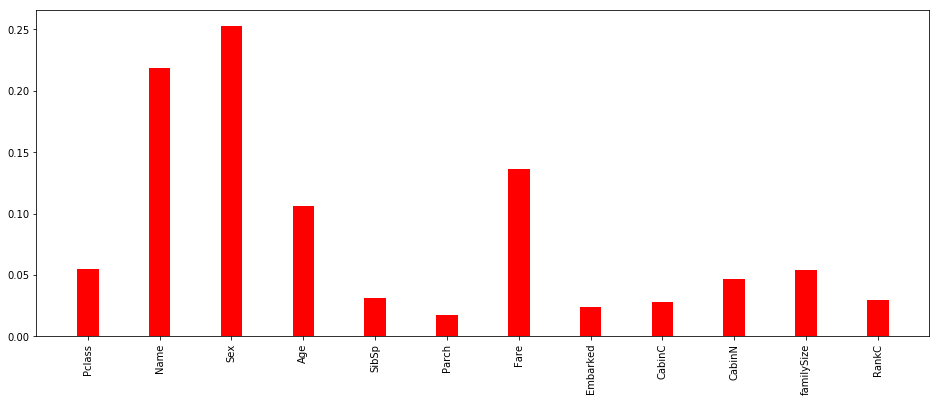

In [301]:
## replot feature importance
plot_ft_imp(tdata,RFC3.feature_importances_)

#### Name feature still has a strong impact on the model. But all other features seem to look more correlated with data exploration findings.

### Update testing summary

| Model Type | Parameters | Classification Accuracy(%) | Confusion Matrix | CV model variance |
| --- | --- | --- | --- | --- |
| Pure Guess | Guess based on Majority(Deceased) | 61.62 | [[549,0][342,0]]| None |
| Random Forest | Default cleaned data, gini, min_samples_split=12, min_samples_leaf=1, 80 estimators | cv average 83.95 | [[147,17][33,71]]| 8.6*10^-4 |
| Random Forest | Combined FamilySize, RankC | cv average 84.18 | [[143,21][33,71]]| 5.5*10^-4 |
| Random Forest | Combined FamilySize, RankC, frequencyEcode 'Embarked'| cv average 83.62 | [[144,20][32,79]]| 5.52*10^-4 |
| Random Forest | Data features remain, but remapped 'Name' into less categories | cv average 83.05 | [[147,17][33,71]] | 6.2*10^-4

#### According to the above testing on feature engineering, I decide to go with model that only does the combination of 'Parch' and 'SipSp'.

In [303]:
tdata = pd.read_csv('cleaned_train.csv',index_col=0)
tdata['familySize']=tdata['SibSp']+tdata['Parch']+1
tdata=tdata.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(tdata,y,test_size=0.3,random_state=22)
RFC4 = RandomForestClassifier(n_estimators=80, min_samples_split=12, min_samples_leaf=1,oob_score=True,random_state=22)

In [304]:
RFC4.fit(X_train,y_train)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

In [305]:
y_pred = RFC4.predict(X_test)
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 81.34328358208955 %
Confusion Matrix is:
 [[146  18]
 [ 32  72]]
Classification Error is:
 18.656716417910445 %


In [306]:
scores4 = cross_val_score(RFC4,tdata,y,cv=5)
print("Average accuracy score from cv:",np.mean(scores4)*100,"%")
print("Classification Accuracy score variance from cv:",np.var(scores3))

/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed whe

Average accuracy score from cv: 83.95751523076032 %
Classification Accuracy score variance from cv: 0.0006236620683643984


In [308]:
# Train with entire training dataset
RFC4.fit(tdata,y)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

In [311]:
#load test data
testd = pd.read_csv('cleaned_test.csv',index_col='PassengerId')
testd['familySize']=testd['SibSp']+testd['Parch']+1

In [312]:
test_pred=RFC4.predict(testd)

In [313]:
fea_eg_res = pd.read_csv('cleaned_test.csv',usecols=['PassengerId'])
fea_eg_res['Survived']=test_pred

In [314]:
fea_eg_res.to_csv('prediction3.csv',index=None)

#### Above I used the last set of feature engineering, Same Random Forest model hyper-parameters to do a prediction. Submit to Kaggle, The result yields ranking #1239(11%), score 0.8038. A 2.9% improvement.